In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image
x_train = np.load('/content/drive/MyDrive/HW11/train_x.npy')
x_train = (x_train - 127.5 ) / 127.5

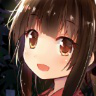

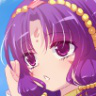

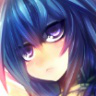

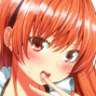

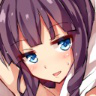

In [ ]:
# print the first 5 images, and preprocess data
for i in range(5):
  img = x_train[i, :, :, :]
  img = tf.keras.preprocessing.image.array_to_img(img)
  display(img)

In [ ]:
# Build generator, the targeted image size is the same with the training data (96, 96, 3)
input_size = 100 # Input vector size
m = 100 # number of images trained in each iteration

generator = tf.keras.Sequential([tf.keras.Input(shape=(input_size)),
                                 tf.keras.layers.Dense(24*24*256, use_bias=False),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.LeakyReLU(),

                                 tf.keras.layers.Reshape(target_shape=(24, 24, 256)),

                                 tf.keras.layers.Conv2DTranspose(128, 5, strides=1, padding='same', use_bias=False),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.LeakyReLU(),

                                 tf.keras.layers.Conv2DTranspose(64, 5, strides=2, padding='same', use_bias=False),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.LeakyReLU(),

                                 tf.keras.layers.Conv2DTranspose(3, 5, strides=2, padding='same', use_bias=False)])

In [ ]:
# Build discriminator
discriminator = tf.keras.Sequential([tf.keras.layers.Input(shape=(96, 96, 3)),
                                     tf.keras.layers.Conv2D(64, 5, strides=2, padding='same', use_bias=False),
                                     tf.keras.layers.LeakyReLU(),
                                     tf.keras.layers.Dropout(0.3),

                         tf.keras.layers.Conv2D(128, 5, strides=2, padding='same', use_bias=False),
                         tf.keras.layers.LeakyReLU(),
                         tf.keras.layers.Dropout(0.3),
                         
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(1)                
])

In [ ]:
# def losses for discriminator training and generator training
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
epochs = 50
input_image_size = (m, 96, 96, 3)

for i in range(epochs):
  print("Current epoch is:"+str(i))
  for j in range(100):
    real_images = x_train[j*100:j*100+100, :, :, :]
    
    noise = tf.random.normal([m, input_size])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(real_images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  # g_inputs = tf.random.normal([m, input_size])
  # g_images = generator(g_inputs)

  # d_train_x = tf.concat((real_images, g_images), axis=0)
  # d_train_y = tf.concat((tf.ones(shape=(m, )), tf.zeros(shape=(m, ))), axis=0)

  # # Train discriminator
  # # generator.trainable = False
  # # discriminator.trainable = True
  # discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.losses.BinaryCrossentropy(from_logits=True))
  # discriminator.fit(d_train_x, d_train_y, epochs=5, verbose=1)

  # # Trian generator
  # # generator.trainable = True
  # # discriminator.trainable = False
  # g_train_x = np.random.rand(m, input_size)
  # g_train_y = tf.ones(shape=(m, ))
  # generator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=generator_loss)
  # generator.fit(g_train_x, g_train_y, epochs=1, verbose=1)

Current epoch is:0
Current epoch is:1
Current epoch is:2
Current epoch is:3
Current epoch is:4
Current epoch is:5
Current epoch is:6
Current epoch is:7
Current epoch is:8
Current epoch is:9
Current epoch is:10
Current epoch is:11
Current epoch is:12
Current epoch is:13
Current epoch is:14
Current epoch is:15
Current epoch is:16
Current epoch is:17
Current epoch is:18
Current epoch is:19
Current epoch is:20
Current epoch is:21
Current epoch is:22
Current epoch is:23
Current epoch is:24
Current epoch is:25
Current epoch is:26
Current epoch is:27
Current epoch is:28
Current epoch is:29
Current epoch is:30
Current epoch is:31
Current epoch is:32
Current epoch is:33
Current epoch is:34
Current epoch is:35
Current epoch is:36
Current epoch is:37
Current epoch is:38
Current epoch is:39
Current epoch is:40
Current epoch is:41
Current epoch is:42
Current epoch is:43
Current epoch is:44
Current epoch is:45
Current epoch is:46
Current epoch is:47
Current epoch is:48
Current epoch is:49


In [ ]:
generator.save('/content/drive/MyDrive/HW11/g.h5')
discriminator.save('/content/drive/MyDrive/HW11/d.h5')

tf.Tensor(
[[-0.09500125]
 [ 6.286194  ]
 [ 3.7864673 ]
 [ 1.5466774 ]
 [ 2.5584834 ]
 [ 5.650193  ]], shape=(6, 1), dtype=float32)


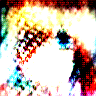

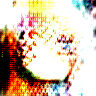

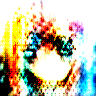

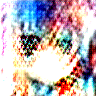

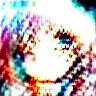

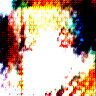

In [ ]:
# use trained generator to generate images
g_inputs = tf.random.normal([6, input_size])
print(discriminator(generator(g_inputs)))
generated_images = tf.cast(generator.predict(g_inputs) * 127.5 + 127.5, dtype='int64')
generated_images = tf.clip_by_value(generated_images, clip_value_min=0, clip_value_max=255)

for i in range(6):
  img = tf.keras.preprocessing.image.array_to_img(generated_images[i, :, :, :])
  display(img)